In [76]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [77]:
df = pd.read_csv('data.csv')
df

,CarPrice (INR),Horsepower (hp),FuelEfficiency (mpg)
0,2500000,200,30
1,3000000,250,25
2,2000000,180,35
3,3500000,300,20
4,4500000,220,28
5,5500000,280,22
6,6000000,320,18
7,4200000,200,30
8,7000000,350,15
9,4800000,240,26


In [78]:
import numpy as np

data = np.genfromtxt('data.csv', delimiter=',', skip_header=1)

X = data[:, 1:] 
Y = data[:, 0]   
# print(X)
# Normalization
X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)

# Adding bias
ones_column = np.ones((X_normalized.shape[0], 1))
X_normalized = np.concatenate((ones_column, X_normalized), axis=1)


X_transpose = np.transpose(X_normalized)
coefficients = np.linalg.inv(X_transpose @ X_normalized) @ X_transpose @ Y

print("Intercept (Beta 0):", coefficients[0])
print("Coefficients for Horsepower, Fuel Efficiency (Beta 1, Beta 2):", coefficients[1:])

[[200.  30.]
 [250.  25.]
 [180.  35.]
 [300.  20.]
 [220.  28.]
 [280.  22.]
 [320.  18.]
 [200.  30.]
 [350.  15.]
 [240.  26.]
 [400.  12.]
 [330.  17.]
 [280.  22.]
 [230.  28.]
 [380.  15.]
 [250.  24.]
 [300.  20.]]
Intercept (Beta 0): 5482352.94117647
Coefficients for Horsepower, Fuel Efficiency (Beta 1, Beta 2): [ 824700.17628858 -781454.4018334 ]


Intercept (Beta 0): 5482352.94117647
Coefficients for Horsepower, Fuel Efficiency (Beta 1, Beta 2): [ 824700.17628858 -781454.4018334 ]


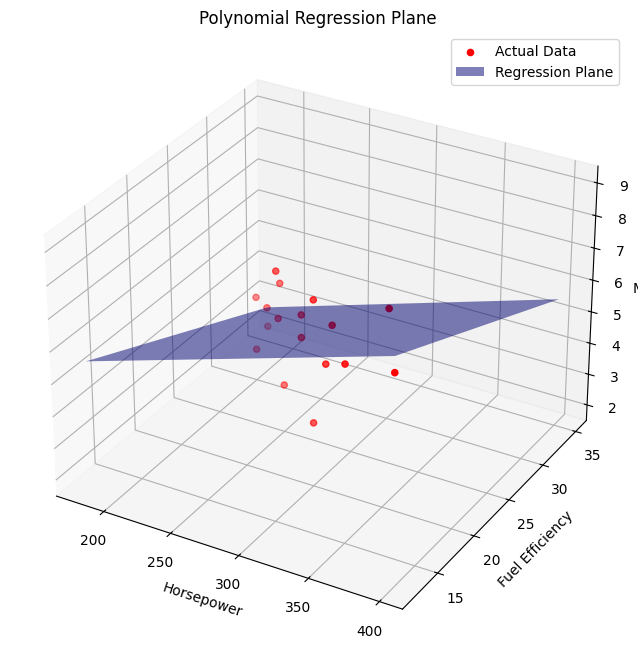

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = np.genfromtxt('data.csv', delimiter=',', skip_header=1)

X = data[:, 1:] 
Y = data[:, 0]

# Normalization
X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)

# Adding bias
ones_column = np.ones((X_normalized.shape[0], 1))
X_normalized = np.concatenate((ones_column, X_normalized), axis=1)

# Compute coefficients
X_transpose = np.transpose(X_normalized)
coefficients = np.linalg.inv(X_transpose @ X_normalized) @ X_transpose @ Y

print("Intercept (Beta 0):", coefficients[0])
print("Coefficients for Horsepower, Fuel Efficiency (Beta 1, Beta 2):", coefficients[1:])

# Generate data for plotting
x1 = np.linspace(X[:,0].min(), X[:,0].max(), 20)
x2 = np.linspace(X[:,1].min(), X[:,1].max(), 20)
x1, x2 = np.meshgrid(x1, x2)
y_pred = coefficients[0] + coefficients[1] * ((x1 - X.mean(axis=0)[0]) / X.std(axis=0)[0]) + coefficients[2] * ((x2 - X.mean(axis=0)[1]) / X.std(axis=0)[1])

# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y, c='r', marker='o', label='Actual Data')
ax.plot_surface(x1, x2, y_pred, alpha=0.5, rstride=100, cstride=100, color='b', label='Regression Plane')
ax.set_xlabel('Horsepower')
ax.set_ylabel('Fuel Efficiency')
ax.set_zlabel('MPG')
plt.title('Polynomial Regression Plane')
plt.legend()
plt.show()


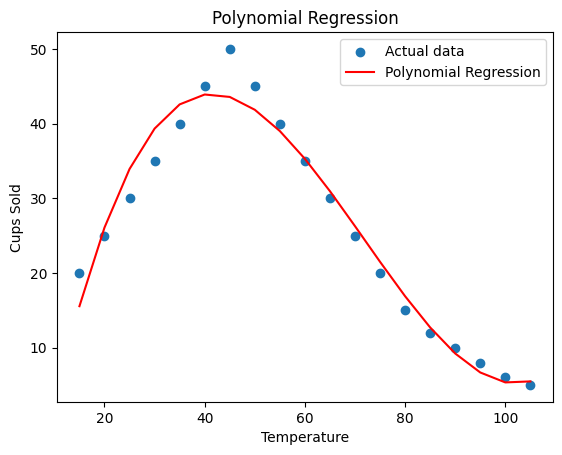

In [75]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('data2.csv', delimiter=',', skip_header=1)

X = data[:, 0]
y = data[:, 1]

def polynomial_regression(X, y, degree):
    X_poly = np.column_stack([X**i for i in range(1, degree+1)])

    X_poly = np.column_stack([np.ones(X_poly.shape[0]), X_poly])

    coefficients = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)

    return coefficients

def predict(X, coefficients):
    X_poly = np.column_stack([X**i for i in range(1, len(coefficients))])

    X_poly = np.column_stack([np.ones(X_poly.shape[0]), X_poly])

    y_pred = X_poly.dot(coefficients)

    return y_pred

degree = 3

coefficients = polynomial_regression(X, y, degree)

y_pred = predict(X, coefficients)

plt.scatter(X, y, label='Actual data')
plt.plot(X, y_pred, color='red', label='Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Cups Sold')
plt.title('Polynomial Regression')
plt.legend()
plt.show()